In [1]:
library(tidyverse)
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")
library(e1071)
library(mosaic)

dfSC = read.csv("CumulativeCases.csv", header = T)
dfSD = read.csv("TotalDeaths.csv", header = T)
dfSR = read.csv("TotalRecovered2003.csv")
dfCC = read.csv("CumulCases2020.csv")
dfCD = read.csv("TotalDeaths2020.csv")

dfW_7 = read.csv("WHOselect7.csv", header = T)

cumulSC = read.csv("Cumulative.csv")
totDLD = read.csv("TotalDeathsLD.csv")

cumulSC20 = read.csv("Cumulative20.csv")

dfC3 = read.csv("CulumNon-Interpolated2003.csv", header = T)
dfD3 = read.csv("DeathNon-Interpolated2003.csv", header = T)
dfR3 = read.csv("RecoveredNon-Interpolated2003.csv", header = T)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: lattice

Loading required package: ggformula

Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh



New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")

Loading required package: mosaicData

Loading required package: Matrix


Attaching package: ‘Matrix’


The following obj

The histogram and boxplot are displaying the distribution of the number of cumulative cases in each selected country during the 2003 SARS outbreak. 

In [ ]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)
hist(t2003, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003 SARS Outbreak", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Number of Total Cases SARS 2003", main = "Boxplot of Number of Cases SARS 2003")

The distribution is positively skewed and has heavier tails. The number of cumulative cases in China seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the number of cumulative cases in each selected country during the 2003 SARS outbreak (excluding China). 

In [ ]:
t2003_2 = c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003)
hist(t2003_2, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003: SARS Outbreak W/O Outliers", breaks = 20)
skew <- skewness(t2003_2)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003_2)
cat("Kurtosis: ", k)

favstats(t2003_2)
boxplot(t2003_2, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases SARS 2003 W/O Outliers")

The skew decreased significantly after the removal of China's 2003 SARS cumulative case data. According to the skew value, the distribution is almost completely normal. The kurtosis value indicates that the new distribution has light tails.  

The histogram and boxplot are displaying the distribution of the number of cumulative cases in each selected country during the 2020 COVID-19 outbreak. 

In [ ]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)
hist(t2020, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2020: COVID Outbreak", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases in 2020: COVID Outbreak")

The distribution is slightly positively skewed and is not completely normal. No outliers were found in this data. The kurtosis was a large negative value, which means that the distribution had light tails. 

The histogram and boxplot are displaying the distribution of the death totals in each selected country during the 2003 SARS outbreak.

In [ ]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2003: SARS Outbreak", breaks = 25)
skew <- skewness(d2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2003)
cat("Kurtosis: ", k)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2003 SARS Outbreak")

The distribution is positively skewed and has heavier tails. The total deaths in China seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the death totals in each selected country during the 2003 SARS outbreak (excluding China).

In [ ]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Number of Deaths in 2003: SARS Outbreak W/O Outliers", breaks = 15)
skew <- skewness(d2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2003)
cat("Kurtosis: ", k)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Number of Deaths 2003 SARS Outbreak W/O Outliers")

The removal of China created a new distribution with lighter tails. The distribution is still positively skewed. However, the removal of China significantly lowered the skewness of the data. 

The histogram and boxplot are displaying the distribution of the death totals in each selected country during the COVID-19 outbreak.

In [ ]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Italy.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2020: COVID Outbreak", breaks = 20)
skew <- skewness(d2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2020)
cat("Kurtosis: ", k)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2020 COVID Outbreak")

The distribution is positively skewed. The kurtosis value indicates that the distribution does not have lighter or heavier tails.The total deaths in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the death totals in each selected country during the COVID-19 outbreak (excluding Italy).

In [ ]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Number of Deaths in 2020: COVID Outbreak W/O Outliers", breaks = 15)
skew <- skewness(d2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2020)
cat("Kurtosis: ", k)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Number of Deaths 2020 COVID Outbreak W/O Outliers")

The removal of Italy created a new distribution with lighter tails. The distribution is still positively skewed. However, the removal of Italy significantly lowered the skewness of the data. 

This loop calculates the percentage of the population that were infected by SARS in each selected country.

In [ ]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)

pop <- c(31644028, 82534176, 57313203, 4114826, 290107933, 82301656, 1288000000)

for (i in 1:length(pop)) {
    t2003[i] <- t2003[i]/pop[i]
}
t2003

The histogram and boxplot are displaying the distribution of the percentage of infected in each selected country during the SARS outbreak.

In [ ]:
hist(t2003, xlab ='Percentage of Population Infected', main = "Percentage of Population Infected: 2003 SARS Outbreak", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Percentage of Population Infected", main = "Boxplot of Percentage of Population Infected: SARS 2003")

The distribution is positively skewed. The kurtosis value indicates that the distribution has heavier tails. The percentage of infected population in Singapore seems to be an outlier. The outlier is removed in order to see how the distribution changes.

In [ ]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)

pop <- c(31644028, 82534176, 57313203, 290107933, 82301656, 1288000000)

for (i in 1:length(pop)) {
    t2003[i] <- t2003[i]/pop[i]
}
t2003

The histogram and boxplot are displaying the distribution of the percentage of infected in each selected country during the SARS outbreak (excluding Singapore).

In [ ]:
hist(t2003, xlab ='Percentage of Population Infected', main = "Histogram of Percentage of Population Infected During 2003 SARS Outbreak", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Percentage of Population Infected SARS 2003", main = "Boxplot of Percentage of Population Infected SARS 2003")

The removal of Singapore created an new distribution with lighter tails. The distribution is still positively skewed. However, the removal of Singapore significantly lowered the skewness of the data. A new outlier appears in this distribution. The outlier is Canada. 

This for loop finds the percentage of confirmed cases that resulted in deaths in the 2003 SARS outbreak. 

In [ ]:
td2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)

d2003 <- c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003)

for (i in 1:length(d2003)) {
    td2003[i] <- d2003[i]/td2003[i]
}

td2003

The histogram and boxplot are displaying the distribution of the percentage of confirmed cases that resulted in deaths in each country during the SARS outbreak.

In [ ]:
hist(td2003, xlab ='Percentage that Resulted in Deaths', main = "Histogram of Percentage of Confirmed Cases that resulted in Deaths During 2003 SARS Outbreak", breaks = 30)
skew <- skewness(td2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(td2003)
cat("Kurtosis: ", k)

favstats(td2003)
boxplot(td2003, ylab = "Percentage that Resulted in Deaths SARS 2003", main = "Boxplot of Percentage of Confirmed Cases that Resulted in Deaths SARS 2003")

The distribution is slightly positively skewed. The kurtosis value indicates that the distribution has lighter tails. 
There are no outliers for this distribution. Singapore has the highest percentage of confirmed cases resulting in deaths, but Canada is a close second. 

This loop calculates the percentage of the population that were infected by COVID-19 in each country.

In [ ]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

pop <- c(37057765, 82905782, 60421760, 5638676, 326687501, 95540395, 1393000000)

for (i in 1:length(pop)) {
    t2020[i] <- t2020[i]/pop[i]
}
t2020

The histogram and boxplot are displaying the distribution of the percentage of infected in each selected country during the COVID-19 outbreak.

In [ ]:
hist(t2020, xlab ='Percentage of Population Infected', main = "Histogram of Percentage of Population Infected During 2020: COVID Outbreak", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Percentage of Population Infected", main = "Boxplot of Percent Infected in Each Country in 2020: COVID Outbreak")

The distribution is positively skewed. The kurtosis value indicates that the distribution has lighter tails. The percentage of infected population in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes.

In [ ]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

pop <- c(37057765, 82905782, 5638676, 326687501, 95540395, 1393000000)

for (i in 1:length(pop)) {
    t2020[i] <- t2020[i]/pop[i]
}
t2020

The histogram and boxplot are displaying the distribution of the percentage of infected in each country during the COVID-19 outbreak (excluding Italy).

In [ ]:
hist(t2020, xlab ='Percentage of Population Infected', main = "Histogram of Percentage of Population Infected During 2020: COVID Outbreak", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Percentage of Population Infected", main = "Boxplot of Percent Infected in Each Country in 2020: COVID Outbreak W/O Outliers")

With the removal of Italy, the tails became lighter and the skew became smaller. However, the skew stayed positive. 

This for loop finds the percentage of confirmed cases that resulted in deaths during the COVID-19 outbreak. 

In [ ]:
td2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

d2020 <- c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Italy.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)

for (i in 1:length(d2020)) {
    td2020[i] <- d2020[i]/td2020[i]
}

td2020

The histogram and boxplot are displaying the distribution of the percentage of confirmed cases that resulted in deaths in each selected country during the COVID-19 outbreak.

In [ ]:
hist(td2020, xlab ='Percentage that Resulted in Deaths', main = "Percentage of Confirmed Cases Resulting in Deaths COVID-19 Outbreak", breaks = 30)
skew <- skewness(td2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(td2020)
cat("Kurtosis: ", k)

favstats(td2020)
boxplot(td2020, ylab = "Percentage Deaths COVID-19 Outbreak", main = "Percentage of Confirmed Cases Resulting in Deaths COVID-19")

The distribution is positively skewed. The kurtosis value indicates that the distribution has heavier tails. The percentage of cases resulting in deaths in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes.

In [ ]:
td2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

d2020 <- c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)

for (i in 1:length(d2020)) {
    td2020[i] <- d2020[i]/td2020[i]
}

td2020

The histogram and boxplot are displaying the distribution of the percentage of confirmed cases that resulted in deaths in each selected country during the COVID-19 outbreak (excluding Italy).

In [ ]:
hist(td2020, xlab ='Percentage that Resulted in Deaths', main = "Percentage of Confirmed Cases Resulting in Deaths COVID-19 Outbreak", breaks = 30)
skew <- skewness(td2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(td2020)
cat("Kurtosis: ", k)

favstats(td2020)
boxplot(td2020, ylab = "Percentage Deaths COVID-19 Outbreak", main = "Percentage of Confirmed Cases Resulting in Deaths COVID-19")

With the removal of Italy, the new distribution decreased in skewness. The tails of the distribution became lighter. China is the outlier of this distribution.

In [ ]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(totDLD$Canada.2020, totDLD$Canada.2003, totDLD$Germany.2020, totDLD$Germany.2003,
                          totDLD$Italy.2020, totDLD$Italy.2003, totDLD$Singapore.2020, totDLD$Singapore.2003,
                          totDLD$US.2020, totDLD$US.2003, totDLD$Vietnam.2020, totDLD$Vietnam.2003,
                          totDLD$China.2020, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'burlywood4') + 
                    ggtitle("Comparison of countries: Death Totals from Both Outbreaks") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

The barchart shows that the number of deaths in each selected country is mostly larger for the COVID-19 outbreak. The exceptions to this claim are Singapore and Vietnam. The total number of deaths in China's SARS 2003 outbreak is slightly larger than Germany's COVID-19 death total. 

In [ ]:
data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(cumulSC$Canada.2020, cumulSC$Canada.2003, cumulSC$Germany.2020, cumulSC$Germany.2003,
                          cumulSC$Italy.2020, cumulSC$Italy.2003, cumulSC$Singapore.2020, cumulSC$Singapore.2003,
                          cumulSC$US.2020, cumulSC$US.2003, cumulSC$Vietnam.2020, cumulSC$Vietnam.2003,
                          cumulSC$China.2020, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'orange2') + 
                    ggtitle("Comparison of countries: Cumulative Cases from Both Outbreaks") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

The barchart shows that the number of cumulative cases in each selected country is mostly larger for the COVID-19 outbreak.  The total number of cumulative cases in China's SARS 2003 outbreak is slightly larger than Canada's COVID-19 total of cumulative cases.

In [ ]:
data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003,
                        cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'deeppink2') + 
                    ggtitle("Comparison of countries: Cumulative Cases SARS 2003") + xlab("Country And Year") + ylab("Total Cases") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

This barchart shows that China has the most cases out of the selected countries. The US, Singapore,and Canada seem to have a similar number of cumulative cases. 

In [ ]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003,
                           totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill="steelblue") + 
                    ggtitle("Comparison of countries: Death Totals SARS 2003") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

This barchart shows that China had the highest number of deaths. Canada and Singapore had a similar number of deaths during the SARS outbreak. The United States, Germany, and Italy did not have a case that resulted in death.  

In [ ]:
library(pwr)
library(distr)

In [ ]:
pwr.t.test(n = 96, d = 0.5, sig.level = 0.05, alternative = "greater")

The t tests comparing the death totals, in selected countries, from the 2003 SARS Outbreak will have 96.4% power. 

In [ ]:
pwr.t.test(d=0.5, sig.level = 0.05, power = 0.8, alternative = "greater")

50 days of SARS data needs to be collected in each country to have 0.8 power. 

In [ ]:
dfSC <- dfSC %>%
            rename(CanadaC = Canada,
              GermanyC = Germany,
              ItalyC = Italy,
              SingaporeC = Singapore,
              UnitedStatesC = United.States,
              VietnamC = Vietnam,
              ChinaC = China, 
              DateC = Date)

dfSD <- dfSD %>%
            rename(CanadaD = Canada,
              GermanyD = Germany,
              ItalyD = Italy,
              SingaporeD = Singapore,
              UnitedStatesD = United.States,
              VietnamD = Vietnam,
              ChinaD = China,
              DateD = Date)

dfSR <- dfSR %>%
            rename(CanadaR = Canada,
              GermanyR = Germany,
              ItalyR = Italy,
              SingaporeR = Singapore,
              UnitedStatesR = United.States,
              VietnamR = Vietnam,
              ChinaR = China,
              DateR = Date)

dfSA <- cbind(dfSC, dfSD, dfSR)

dfSA <- dfSA %>%
    mutate(CanadaA = CanadaC - CanadaD - CanadaR)

dfSA <- dfSA %>%
    mutate(GermanyA = GermanyC - GermanyD - GermanyR)

dfSA <- dfSA %>%
    mutate(ItalyA = ItalyC - ItalyD - ItalyR)

dfSA <- dfSA %>%
    mutate(SingaporeA = SingaporeC - SingaporeD - SingaporeR)

dfSA <- dfSA %>%
    mutate(UnitedStatesA = UnitedStatesC - UnitedStatesD - UnitedStatesR)

dfSA <- dfSA %>%
    mutate(VietnamA = VietnamC - VietnamD - VietnamR)

dfSA <- dfSA %>%
    mutate(ChinaA = ChinaC - ChinaD - ChinaR)

Bonferroni Correction was used because multiple t-tests were performed. This correction decreases the probability of a type 1 error occuring. 

In [ ]:
p_value = 0.05/6
cat("p_value: ", p_value)

In [ ]:
ttest = t.test(dfSA$UnitedStatesA, dfSA$ChinaA, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. 
Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries. 

We must fail to reject the null hypothesis for the t-test between China and United States. The p-value is above 0.0083. Additionally, the 95% confidence interval includes 0. Therefore, we can not conclude that the mean difference between the two groups is 0. 

China and America will be placed in the same category for the mean active SARS cases over the course of the outbreak. The category will be labeled 1 for the highest average of active SARS cases per day during the outbreak. 

In [ ]:
ttest = t.test(dfSA$UnitedStatesA, dfSA$SingaporeA, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must reject the null hypothesis. America has more mean acitve SARS cases over the course of the outbreak than Singapore. The p-value is extremely small and lower than 0.0083. Additionally, the 95% confidence interval does not include 0. 

Singapore will be placed in the second category. Since, the United States and China did not have a significant difference, we can assume that Singapore significantly differed from China. 

In [ ]:
ttest = t.test(dfSA$SingaporeA, dfSA$CanadaA, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must fail to reject the null hypothesis for this t-test. The p-value was much larger than 0.0083. Additionally, the 95% confidence interval included 0. Therefore, we can not conclude that the mean difference between the two groups is 0. 

Singapore and Canada will be placed in the second category. 

In [ ]:
ttest = t.test(dfSA$CanadaA, dfSA$VietnamA, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must reject the null hypothesis. The p-value is extremely small and lower than 0.0083. Additionally, the 95% confidence interval does not include 0. Canada has more mean acitve SARS cases over the course of the outbreak than Vietnam.

Vietnam will be placed in the third category. 

In [ ]:
ttest = t.test(dfSA$VietnamA, dfSA$GermanyA, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must reject the null hypothesis. The p-value is extremely small and lower than 0.0083. Additionally, the 95% confidence interval does not include 0. Vietnam has more mean acitve SARS cases over the course of the outbreak than Germany.

Germany will be placed in the fourth category. 

In [ ]:
ttest = t.test(dfSA$GermanyA, dfSA$ItalyA, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must fail to reject the null hypothesis. The p-value is above 0.0083. Additionally, the 95% confidence interval includes 0. Therefore, we can not conclude that the mean difference between the two groups is 0. 

Germany and Italy will be placed in the fourth category. 

This table displays the categories for the mean active SARS cases over the course of the outbreak. Countries labelled 1 have the highest mean active SARS cases over the course of the outbreak. Countries labelled 4 have the smallest mean active SARS cases over the course of the outbreak. 

In [ ]:
dfW_7$classification <- c(2,1,4,4,2,1,3)
dfW_7 <- data.frame(dfW_7$Member.State, dfW_7$classification)
dfW_7

In [2]:
library(magrittr)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [54]:
dfW_20 = read.csv("WHOselect20.csv", header = T)

Countries who have more than 0.0000007 (0.00007%) of their population infected are considered high infection and are denoted with a 1 classification. Countries who have less than 0.0000007 (0.00007%) of their population infected are considered low infection and are denoted with a 0 classification. 

In [55]:
t2003 <- c(cumulSC20$China, cumulSC20$Canada, cumulSC20$Germany, cumulSC20$Italy, cumulSC20$Singapore, 
           cumulSC20$US, cumulSC20$United.Kingdom, cumulSC20$Vietnam, cumulSC20$Spain, cumulSC20$Mongolia, 
           cumulSC20$Thailand, 
           cumulSC20$France, cumulSC20$India, cumulSC20$Romania, cumulSC20$South.Africa, cumulSC$Colombia,
          cumulSC20$Finland, cumulSC20$Brazil, cumulSC20$Malaysia, cumulSC20$Kuwait)

pop <- c(1288000000, 31644028, 82534176, 57313203, 4114826, 290107933, 59647577, 82301656, 42187645, 2468762,
        64549866, 62244886, 1112000000, 21574326, 46719196, 41483869, 5213014, 181809246, 24698819, 2161626)

for (i in 1:length(pop)) {
    t2003[i] <- t2003[i]/pop[i]
}
t2003

for (i in 1:length(t2003)) {
    if (t2003[i] > 7*10**-7) {
        t2003[i] <- 1
    }
    else { 
        t2003[i] <- 0
    }
}
t2003

[1] 1.892081e-06 7.963588e-06 1.211619e-07 1.570319e-07 5.006287e-05
 [6] 7.583384e-07 1.005908e-07 7.654767e-07 2.370362e-08 3.645552e-06
[11] 1.394271e-07 1.124590e-07 2.697842e-09 1.390542e-07 2.140448e-08
[16] 2.410576e-08 1.918276e-07 1.650081e-08 3.239021e-07 4.626147e-07

[1] 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0

In [56]:
dfW_20$classification <- c(t2003)

In [57]:
dfW_20 %<>% mutate_if(is.integer,as.numeric)
dfW_20

Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brazil,176257.327,1.4,63,51,6.8,8.1,2.6,2.2,68.9,⋯,34,29,40,246,235,257,136,128,145,1
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,1
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,⋯,41,38,44,165,154,175,104,93,112,0
Colombia,43526.430,1.8,66,59,6.4,7.1,3.0,2.6,71.8,⋯,19,17,21,236,220,251,99,87,113,0
Finland,5197.451,0.3,49,49,18.7,20.3,1.8,1.7,78.2,⋯,3,3,3,135,131,140,60,56,64,1
France,59849.658,0.4,52,53,19.5,20.5,1.7,1.9,79.7,⋯,4,4,5,133,128,138,60,58,62,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,0
India,1049549.474,1.8,68,62,6.9,7.7,3.8,3.1,61.0,⋯,95,86,106,291,268,314,220,197,243,1
Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,79.7,⋯,5,4,5,96,92,100,49,46,51,0


In [58]:
write.csv(dfW_20,"dfW20.csv", row.names = TRUE)

In [59]:
dfW20 = read.csv("dfW20.csv", header = T)

In [60]:
library(caret)
library(randomForest)
library(varImp)
library(naivebayes)

In [61]:
sapply(dfW20, class)

X 
                                                                                   "integer" 
                                                                                Member.State 
                                                                                    "factor" 
                                                                            Total.population 
                                                                                   "numeric" 
                                                            Annual.Growth.Rate.....1992.2002 
                                                                                   "numeric" 
                                                                       Dependency.ratio.1992 
                                                                                   "integer" 
                                                                       Dependency.ratio.2002 
                                                                                   "integer" 
                                                    Percentage.of.population.aged.60...1992. 
                                                                                   "numeric" 
                                                           Percentage.of.population.aged.60. 
                                                                                   "numeric" 
                                                                   Total.Fertility.Rate.1992 
                                                                                   "numeric" 
                                                                   Total.Fertility.Rate.2002 
                                                                                   "numeric" 
                                                    LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 
                                                                                   "numeric" 
                                                 LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years. 
                                                                                   "numeric" 
                LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years..Lower.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years..Upper.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                                               LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years. 
                                                                                   "numeric" 
              LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years..Lower.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
              LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years..Upper.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                                              PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 
                                                                                   "integer" 
  PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000. 
                                                                                   "integer" 
  PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000. 
                                                                                   "integer" 
                                            PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 
                                                                                   "integer" 
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000. 
                                                 

In [62]:
df <- dfW20 
df

X,Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Brazil,176257.327,1.4,63,51,6.8,8.1,2.6,2.2,⋯,34,29,40,246,235,257,136,128,145,1
2,Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,⋯,5,5,5,95,93,97,58,57,60,1
3,China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,⋯,41,38,44,165,154,175,104,93,112,0
4,Colombia,43526.430,1.8,66,59,6.4,7.1,3.0,2.6,⋯,19,17,21,236,220,251,99,87,113,0
5,Finland,5197.451,0.3,49,49,18.7,20.3,1.8,1.7,⋯,3,3,3,135,131,140,60,56,64,1
6,France,59849.658,0.4,52,53,19.5,20.5,1.7,1.9,⋯,4,4,5,133,128,138,60,58,62,1
7,Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,⋯,4,4,4,118,114,123,60,59,62,0
8,India,1049549.474,1.8,68,62,6.9,7.7,3.8,3.1,⋯,95,86,106,291,268,314,220,197,243,1
9,Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,⋯,5,4,5,96,92,100,49,46,51,0


In [63]:
model_1 <- glm(classification ~ Total.population + Dependency.ratio.2002 + 
               Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
             family = "binomial", data = df) 
summary(model_1)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = classification ~ Total.population + Dependency.ratio.2002 + 
    Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 + 
    LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
    PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 + PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
    PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002, family = "binomial", 
    data = df)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.775e-05  -4.589e-06  -2.110e-08   2.110e-08   2.118e-05  

Coefficients:
                                                   Estimate Std. Error z value
(Intercept)                                      -1.163e+03  1.218e+07   0.000
Total.population                                 -2.529e-04  7.017e-01   0.000
Dependency.ratio.2002                            -3.218e+01  5.034e+04  -0.001
Percentage.of.population.aged.60.                 2.472e+01  2.962e+04   0.001
Total.Fertil

The AIC score for the model including all of the variables is 20. 

In [70]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.65,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Total.population + Dependency.ratio.2002 + 
               Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Generalized Linear Model 

14 samples
 9 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 12, 12, 13, 12, 13, 13, ... 
Resampling results:

  Accuracy  Kappa    
  0.65      0.1666667



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 2
         1 1 0
                                          
               Accuracy : 0.5             
                 95% CI : (0.1181, 0.8819)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : 0.8999          
                                          
                  Kappa : -0.2857         
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.7500          
            Specificity : 0.0000          
         Pos Pred Value : 0.6000          
         Neg Pred Value : 0.0000          
             Prevalence : 0.6667          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.8333          
      Balanced Accuracy : 0.3750          
                                          
       'Positive' Class : 0               
                                          

10 fold Cross Validation was performed on the model. The Accuracy of the model is 75%. The model is not better than the no information rate. This means that the model has the same accuracy as guessing the right classification. The confidence interval is large. At the bounds of the interval, the model might be 20% accurate or 99% accurate. 

glm variable importance

                                                 Overall
Total.population                                  100.00
Total.Fertility.Rate.2002                          81.39
Percentage.of.population.aged.60.                  54.32
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002   48.03
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002     25.51
Dependency.ratio.2002                              22.78
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002        15.86
LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002           15.59
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002           0.00

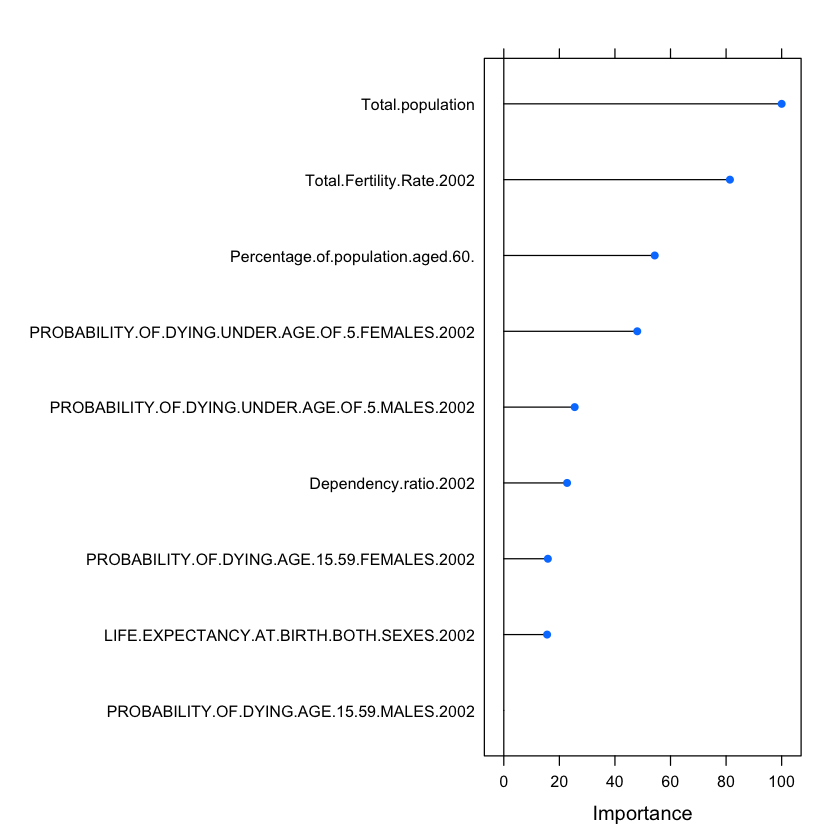

In [65]:
X <- caret::varImp(model)
plot(X)
X

There are six variables above 20 importance. Those variables will be chosen for the second model. 

In [66]:
model_2 <- glm(classification ~ Total.population + Total.Fertility.Rate.2002 + 
               Percentage.of.population.aged.60. + PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + Dependency.ratio.2002,
               family = "binomial", data = df) 
summary(model_2)


Call:
glm(formula = classification ~ Total.population + Total.Fertility.Rate.2002 + 
    Percentage.of.population.aged.60. + PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 + 
    PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + Dependency.ratio.2002, 
    family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8434  -0.5061  -0.1737   0.1366   1.6963  

Coefficients:
                                                   Estimate Std. Error z value
(Intercept)                                       6.900e+00  1.169e+01   0.590
Total.population                                 -3.865e-06  6.328e-06  -0.611
Total.Fertility.Rate.2002                         1.727e+01  9.756e+00   1.771
Percentage.of.population.aged.60.                 9.219e-01  5.112e-01   1.804
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 -1.097e-02  3.587e-01  -0.031
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002    8.870e-02  3.517e-01   0.252
Dependency.ratio.2002      

The AIC score increased from the first model. This indicates that the second model is most likely worse than the first model. 

In [67]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Total.population + Total.Fertility.Rate.2002 + 
               Percentage.of.population.aged.60. + PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + Dependency.ratio.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

16 samples
 6 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 14, 14, 15, 15, 14, 14, ... 
Resampling results:

  Accuracy  Kappa
  0.7       0    



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 1
         1 0 0
                                          
               Accuracy : 0.75            
                 95% CI : (0.1941, 0.9937)
    No Information Rate : 0.75            
    P-Value [Acc > NIR] : 0.7383          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 1.00            
            Specificity : 0.00            
         Pos Pred Value : 0.75            
         Neg Pred Value :  NaN            
             Prevalence : 0.75            
         Detection Rate : 0.75            
   Detection Prevalence : 1.00            
      Balanced Accuracy : 0.50            
                                          
       'Positive' Class : 0               
                                          

In [ ]:
X <- caret::varImp(model)
plot(X)
X

In [ ]:
model_3 <- glm(classification ~ Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               family = "binomial", data = df) 
summary(model_3)

In [ ]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

In [ ]:
X <- caret::varImp(model)
plot(X)
X

In [ ]:
model_4 <- glm(classification ~ Total.Fertility.Rate.2002,
               family = "binomial", data = df) 
summary(model_4)

In [ ]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

In [ ]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(df), 0.8*nrow(df))  # row indices for training data

xvars.train <- as.matrix(df[trainingRowIndex,3:29])
xvars.test <- as.matrix(df[-trainingRowIndex,3:29])

y.train <- as.matrix(df[trainingRowIndex, 30])
y.test <- as.matrix(df[-trainingRowIndex, 30])

In [ ]:
library(glmnet)
fitlasso <- glmnet(xvars.train, y.train, family="binomial", alpha=1)
fitridge <- glmnet(xvars.train, y.train, family="binomial", alpha=0)
fitelnet <- glmnet(xvars.train, y.train, family="binomial", alpha=.5)

In [ ]:
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(xvars.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="binomial"))
}

In [ ]:
##Find best AIC/BIC for each model
##Ridge
tLL <- fitridge$nulldev - deviance(fitridge) ##Likelihood of the model
k <- fitridge$df ##Number of parameters
n <- fitridge$nobs ##Sample Size

##AIC

AICc <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc)
cat("Best AIC for Rigid: ", m, "\n")
best_AIC = match(c(min(AICc)),AICc)
print(paste("Lambda from AIC Ridge = ",fitridge$lambda[best_AIC]))

##BIC
BIC<-log(n)*k - tLL 
m = min(BIC)
cat("Best BIC for Rigid: ", m, "\n")
best_BIC = match(c(min(BIC)),BIC)
print(paste("Lambda from BIC Ridge = ",fitridge$lambda[best_BIC]))

##Lasso
##AIC
tLL <- fitlasso$nulldev - deviance(fitlasso)
k <- fitlasso$df
n <- fitlasso$nobs
AICc_lasso <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc_lasso)##Best AIC
cat("Best AIC for Lasso: ", m, "\n")
best_AIC_lasso = match(c(min(AICc_lasso)),AICc_lasso)##Which index is this?
print(paste("Lambda from AIC Lasso = ",fitlasso$lambda[best_AIC_lasso]))##Find this lambda

##BIC
BIC_lasso<-log(n)*k - tLL 
m = min(BIC_lasso)##Best BIC
cat("Best BIC for Lasso: ", m, "\n")
best_BIC_lasso = match(c(min(BIC_lasso)),BIC_lasso)##Which index is this?
print(paste("Lambda from BIC Lasso= ",fitlasso$lambda[best_BIC_lasso]))

##Elastic Net
##AIC
tLL <- fitelnet$nulldev - deviance(fitelnet)
k <- fitelnet$df
n <- fitelnet$nobs
AICc_elnet <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m= min(AICc_elnet)##Best AIC
cat("Best AIC for Elastic Net: ", m, "\n")
best_AIC_elnet = match(c(min(AICc_elnet)),AICc_elnet)##Which index is this?
print(paste("Lambda AIC enet =",fitelnet$lambda[best_AIC_elnet]))##Find this lambda

##BIC
BIC_elnet<-log(n)*k - tLL 
m= min(BIC_elnet)##Best BIC
cat("Best BIC for Elastic Net: ", m, "\n")
best_BIC_elnet = match(c(min(BIC_elnet)),BIC_elnet)##Which index is this?
print(paste("Lambda BIC enet= ",fitelnet$lambda[best_BIC_elnet]))

#Ridge AIC/BIC
yRidgeAIC <- predict(fit0, s=fitridge$lambda[best_AIC], newx=xvars.test)
mseRidgeAIC <- mean((y.test - yRidgeAIC)^2)
print(paste("mse Ridge AIC = ", mseRidgeAIC))
yRidgeBIC <- predict(fit0, s=fitridge$lambda[best_BIC], newx=xvars.test)
mseRidgeBIC <- mean((y.test - yRidgeBIC)^2)
print(paste("mse Ridge BIC = ", mseRidgeBIC))

#Lasso AIC/BIC
yLassoAIC <- predict(fit10, s=fitlasso$lambda[best_AIC_lasso], newx=xvars.test)
mseLassoAIC <- mean((y.test - yLassoAIC)^2)
print(paste("mse Lasso AIC = ", mseLassoAIC)) 
yLassoBIC <- predict(fit10, s=fitlasso$lambda[best_BIC_lasso], newx=xvars.test)
mseLassoBIC <- mean((y.test - yLassoBIC)^2)
print(paste("mse Lasso BIC = ", mseLassoBIC)) 

#Elastic Net AIC/BIC
yelnetAIC <- predict(fit5, s=fitelnet$lambda[best_AIC_elnet], newx=xvars.test)
mseelnetAIC <- mean((y.test - yelnetAIC)^2)
print(paste("mse elnet AIC = ",mseelnetAIC))

yelnetBIC <- predict(fit5, s=fitelnet$lambda[best_BIC_elnet], newx=xvars.test)
mseelnetBIC <- mean((y.test - yelnetBIC)^2)
print(paste("mse elnet BIC = ",mseelnetBIC))

In [ ]:
dfSC = read.csv("CumulativeCases.csv", header = T)

In [ ]:
dfSC$China[1]

In [ ]:
class(dfSC$Date)
dfSC$Date <- as.character(dfSC$Date)
dfSC$Date <- as.POSIXct(dfSC$Date)

In [ ]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China/7084)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            stat_smooth(method = "glm", method.args = list(family = "binomial"), se = TRUE) + 
            ylab("Percentage of Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")


In [ ]:
log_reg <- glm(China/7084 ~ seq(1,96,1), data = dfSC, family = binomial)

log_reg

In [ ]:
library(stats)

In [ ]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            ylab("Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")

In [ ]:
#find the parameters for the equation
times <- seq(1,96,1)
SS<-getInitial(dfSC$China~SSlogis(times,alpha,xmid,scale),data=data.frame(dfSC$China==dfSC$China,times=times))
SS

In [ ]:
K_0<-SS["alpha"]
R_0<-1/SS["scale"]
N0<-SS["alpha"]/(exp(SS["xmid"]/SS["scale"])+1)
y <- dfSC$China

m<-nls(y~K*N0*exp(R*times)/(K+N0*(exp(R*times)-1)),start=list(K=K_0,R=R_0,N0=N0))
#estimated parameters
summary(m)

c <- cor(y,predict(m))
cat("correlation coefficient: ", c, "\n")

AIC <- AIC(m)
cat("AIC: ", AIC)

In [ ]:
Days = times
Total_cases = dfSC$China

plot(Days, Total_cases) + lines(times,predict(m),col="red", lty=1,lwd=3)
title(main = "Cumulative Cases in China SARS Outbreak 2003")

In [ ]:
yC = read.csv("Comp20032020.csv")

In [ ]:
str(yC)

In [ ]:
yC

In [ ]:
library(lattice)
histogram(~Cumulative.Cases|factor(Year),
         data = yC,
         layout = c(1,2),
         nint = 1,
         xlab = "Cumulative Cases",
         strip = FALSE,
         strip.left = TRUE,
         breaks=seq(from=0,to=150000,by=10000),
         ylab = "Percentage of the Data")

100 percent of the data is below 5000 cumulative cases in 2003. 